In [3]:
a=[26974,26914,16675,10918,11716,9714,6910,5010,4682,4130]

In [3]:
a=[26974,26914,16675,10918,11716,9714,6910,5010,4682,4130]

In [4]:
xpoints=list(range(1,11))

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

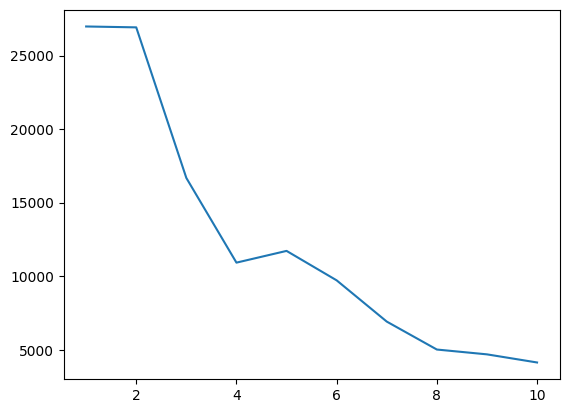

In [7]:
plt.plot(xpoints, a)

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('http://bit.ly/autompg-csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


<Axes: xlabel='hp', ylabel='mpg'>

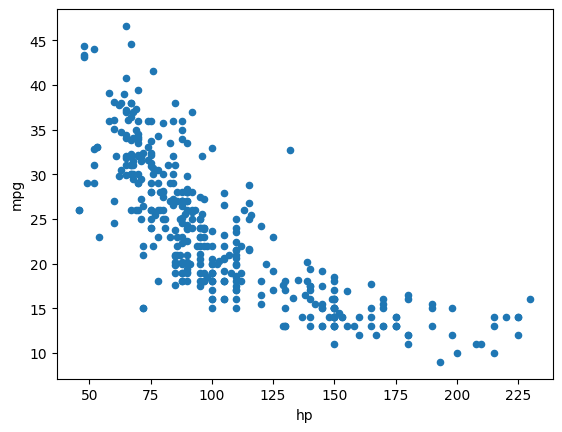

In [5]:
df.plot.scatter(x='hp',y='mpg')

In [1]:
from platform import python_version

print(python_version())

3.10.5


In [2]:
import tensorflow as tf

In [1]:
import numpy as np

In [ ]:
print(np.__version__)              # should be 1.17+
print(tf.__version__)              # should be 2.0+

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

# define the input shape for a 28x28 grayscale image (like MNIST)
# HINT: should be a tuple of height and width
input_shape=( (28, 28) )

# Let's start a sequential model
model = Sequential()

# Let's flatten the 28x28 image to a 784 1D vector
model.add(Flatten(input_shape=input_shape))

# Let's add the input layer as a dense layer of 128 nodes
# HINT: the parameter is the number of nodes
model.add(Dense(128))

# Add the activation function
# HINT: use the best practice convention for a non-output Dense layer
model.add(Activation('relu'))

# Add the hidden layer with 512 nodes
model.add(Dense(512))
model.add(Activation('relu'))

# Add the output layer with 10 nodes
model.add(Dense(10))

# Add the activation function
# HINT: use the best practice for a multi-class classifier
model.add(Activation('softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
 activation_2 (Activation)   (None, 10)                0

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Let's start a sequential model
model = Sequential()

# Let's add a first flattening layer to flatten the 28x28 image into 1D vector
model.add(Flatten(input_shape=(28, 28, 1)))

# Let's add the input layer as a dense layer of 128 nodes
# HINT: use best practices for activation functions
model.add(Dense(128, activation='relu'))

# Add the hidden layer with 512 nodes
model.add(Dense(512, activation='relu'))

# Add the output layer with 10 nodes
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 171658 (670.54 KB)
Trainable params: 171658 (670.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten

# Define the input vector for the 28x28 images
# HINT: Should be a tuple of height and width
inputs = Input((28, 28))

# Let's flatten the image into a 1D vector
# HINT: the input vector is where you defined the input shape
x = Flatten()(inputs)

# Define the input layer and connect the flattened input vector
# HINT: the output of Flatten() is the flattened input vector
x = Dense(128, activation='relu')(x)

# Define the hidden layer and connect the hidden layer to it.
x = Dense(512, activation='relu')(x)

# Define the output layer and connect the hidden layer to it.
outputs = Dense(10, activation='softmax')(x)

# Let's put it together: 
# HINT: inputs to outputs
model = Model(inputs, outputs)

In [9]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 512)               66048     
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 171658 (670.54 KB)
Trainable params: 171658 (670.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
def makeModel():
    # Make a DNN model
    inputs = Input((28, 28))
    x = Flatten()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
    return model

# We make two copies of the model
model_a = makeModel()
model_b = makeModel()

In [14]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [15]:
model_a.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 1.2313 - acc: 0.8598 - val_loss: 0.4115 - val_acc: 0.9188
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4139 - acc: 0.9112 - val_loss: 0.3295 - val_acc: 0.9275
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2999 - acc: 0.9288 - val_loss: 0.1977 - val_acc: 0.9467
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1917 - acc: 0.9487 - val_loss: 0.1502 - val_acc: 0.9577
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1572 - acc: 0.9563 - val_loss: 0.1358 - val_acc: 0.9623
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1450 - acc: 0.9609 - val_loss: 0.1529 - val_acc: 0.9613
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1284 - acc: 0.9648 - val_loss: 0.1283 - val_acc: 0.9668
Epoch 8/10
1688/1688 [==============================] - 2s 1ms

In [16]:
import numpy as np

# Preprocess the image data
x_train = (x_train / 255.0).astype(np.float32)

# Train the model
model_b.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2280 - acc: 0.9330 - val_loss: 0.0930 - val_acc: 0.9710
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0969 - acc: 0.9707 - val_loss: 0.0925 - val_acc: 0.9733
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0671 - acc: 0.9784 - val_loss: 0.0788 - val_acc: 0.9775
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0505 - acc: 0.9836 - val_loss: 0.0915 - val_acc: 0.9740
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0401 - acc: 0.9868 - val_loss: 0.0923 - val_acc: 0.9768
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0332 - acc: 0.9889 - val_loss: 0.0841 - val_acc: 0.9798
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0284 - acc: 0.9905 - val_loss: 0.0939 - val_acc: 0.9772
Epoch 8/10
1688/1688 [==============================] - 2s 1ms

In [2]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])

60000 (28, 28)
60000 5


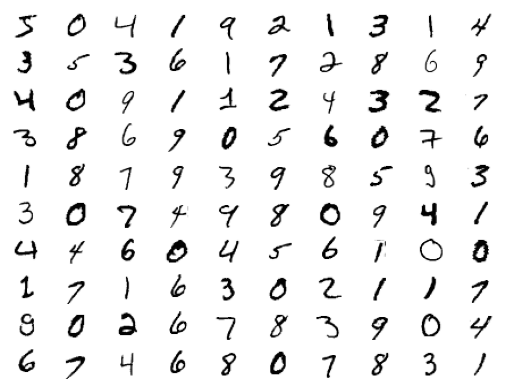

In [3]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')

In [5]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)

training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [6]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
# Recall that before this transformation, training_labels[0] was the value 5. Look now:
print(training_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
422/422 [==============================] - 0s 837us/step - loss: 1.3740 - accuracy: 0.6456 - val_loss: 0.9328 - val_accuracy: 0.8272
Epoch 2/5
422/422 [==============================] - 0s 648us/step - loss: 0.8558 - accuracy: 0.8218 - val_loss: 0.6822 - val_accuracy: 0.8727
Epoch 3/5
422/422 [==============================] - 0s 643us/step - loss: 0.6768 - accuracy: 0.8580 - val_loss: 0.5550 - val_accuracy: 0.8940
Epoch 4/5
422/422 [==============================] - 0s 642us/step - loss: 0.5781 - accuracy: 0.8742 - val_loss: 0.4862 - val_accuracy: 0.9003
Epoch 5/5
422/422 [==============================] - 0s 644us/step - loss: 0.5176 - accuracy: 0.8814 - val_loss: 0.4376 - val_accuracy: 0.9090


313/313 [==============================] - 0s 421us/step - loss: 0.4831 - accuracy: 0.8909


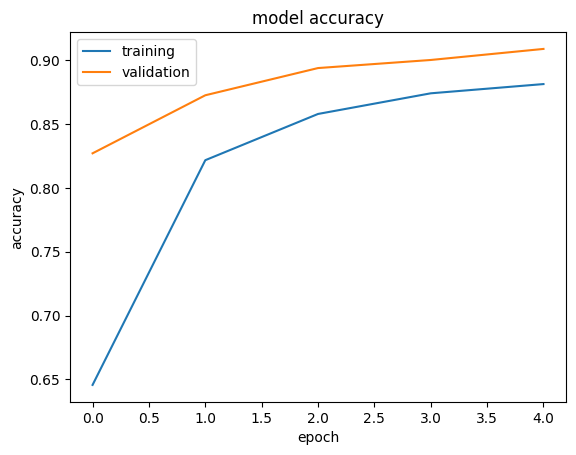

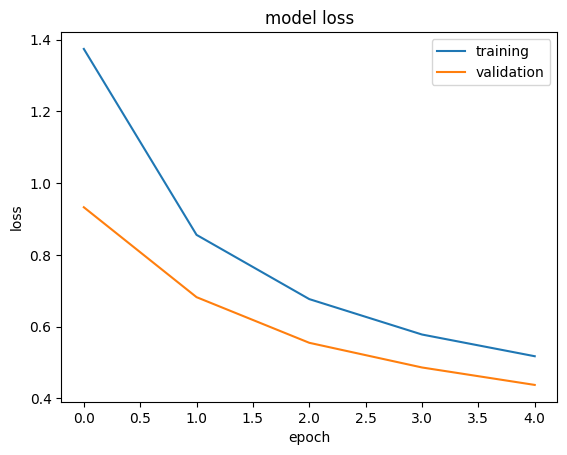

Test loss: 0.483
Test accuracy: 0.891


In [10]:
loss, accuracy = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [11]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

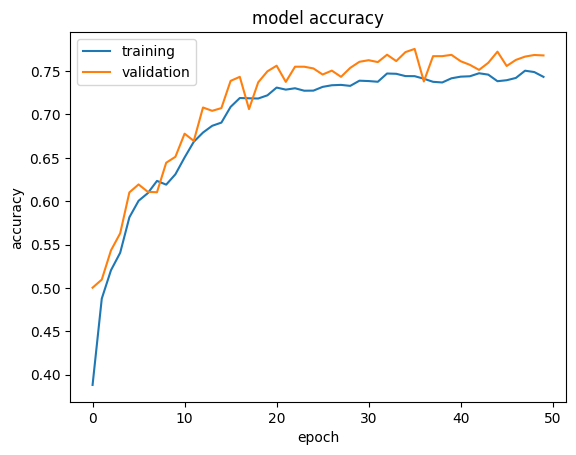

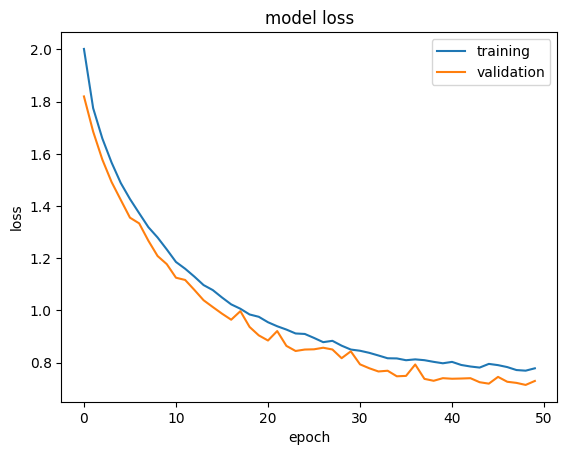

Test loss: 0.784
Test accuracy: 0.752


In [12]:
model = Sequential()

model.add(Dense(units=5, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, model)

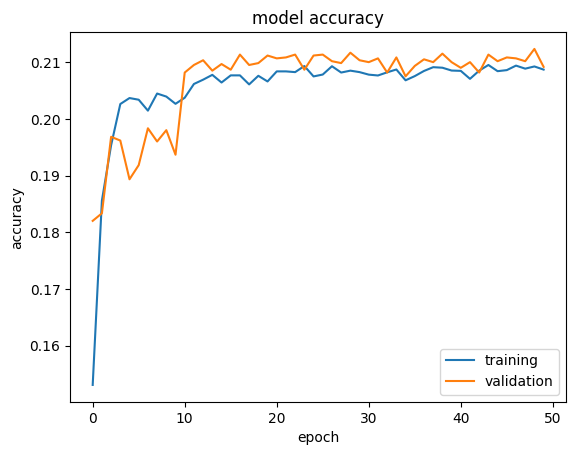

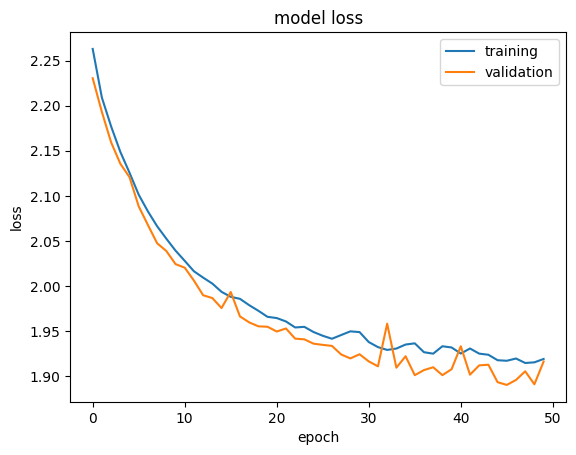

Test loss: 1.92
Test accuracy: 0.208


In [13]:
model = Sequential()

model.add(Dense(units=1, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, model)

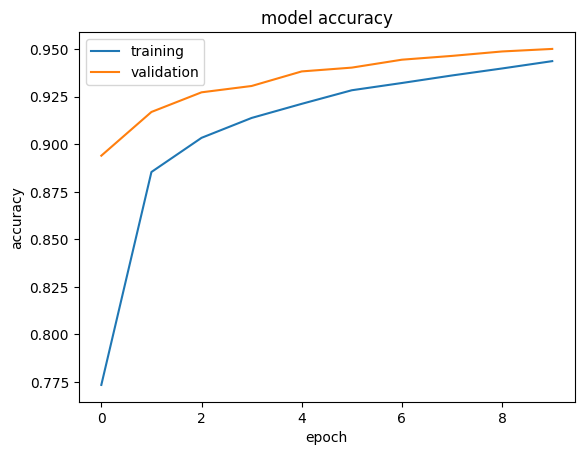

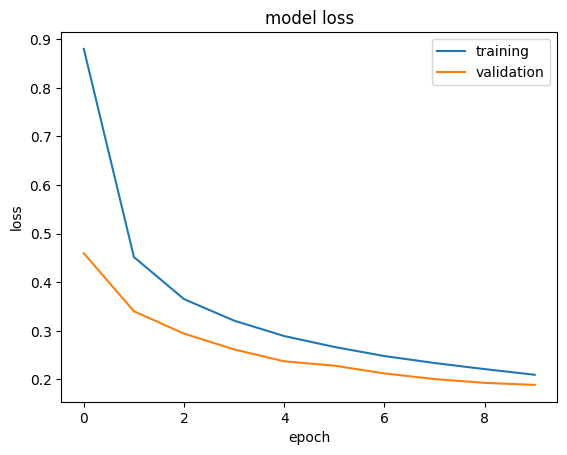

Test loss: 0.216
Test accuracy: 0.939


In [14]:
model = Sequential()

model.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

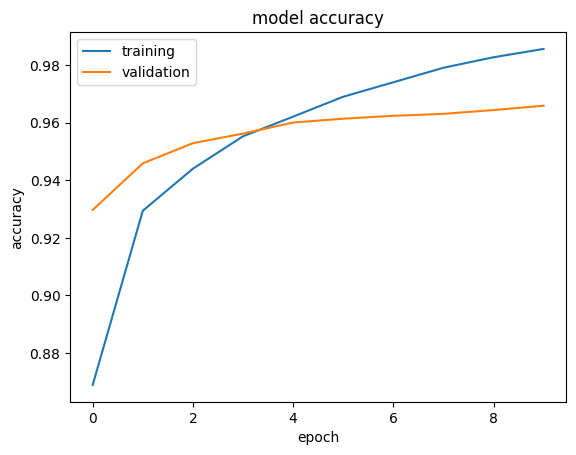

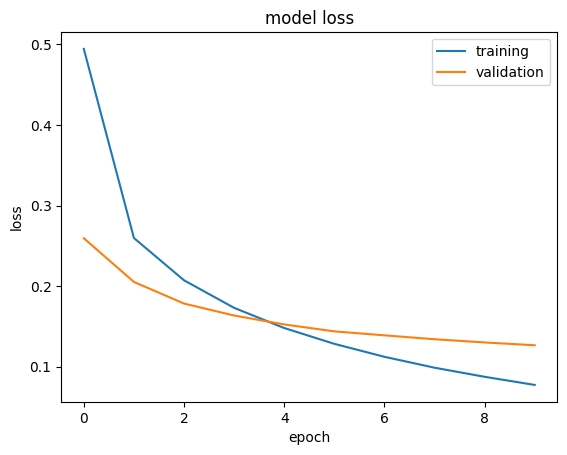

Test loss: 0.148
Test accuracy: 0.956


In [15]:
model = Sequential()

model.add(Dense(units=2048, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 242762 (948.29 KB)
Trainable params: 242762 (948.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


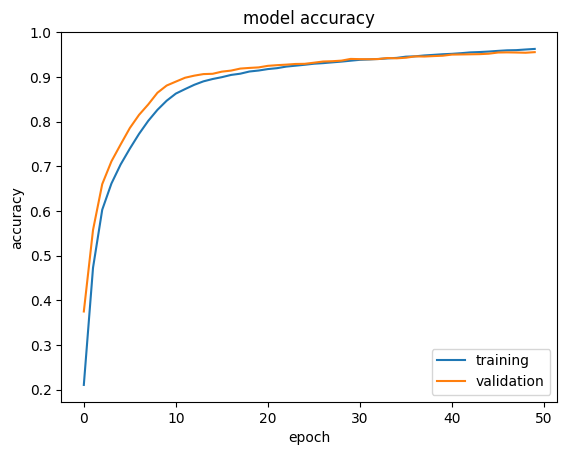

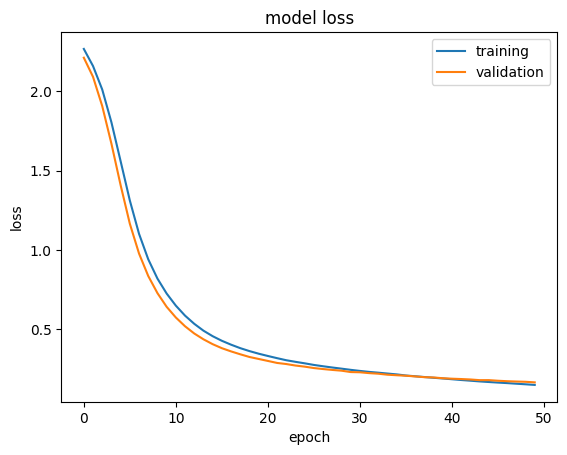

Test loss: 0.19
Test accuracy: 0.945


In [16]:
long_model_two = Sequential()
long_model_two.add(Dense(units=256, activation='sigmoid', input_shape=(image_size,)))
long_model_two.add(Dense(units=128, activation='sigmoid'))
long_model_two.add(Dense(units=64, activation='sigmoid'))
long_model_two.add(Dense(units=num_classes, activation='softmax'))
long_model_two.summary()

long_model_two.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = long_model_two.fit(training_data, training_labels, batch_size=128, epochs=50, verbose=False, validation_split=.1)
plot_training_history(history, long_model_tw)

In [17]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

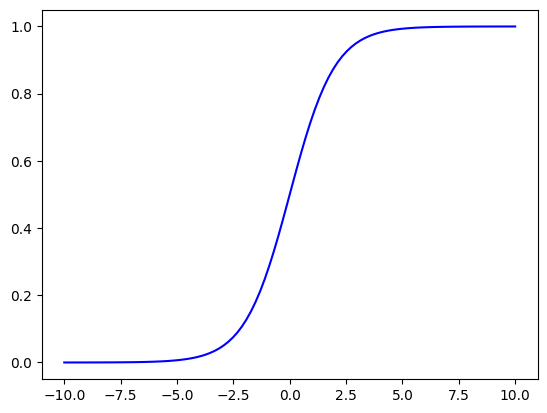

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# np.e is Euler's constant, the base of the natural logarithm 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.show()

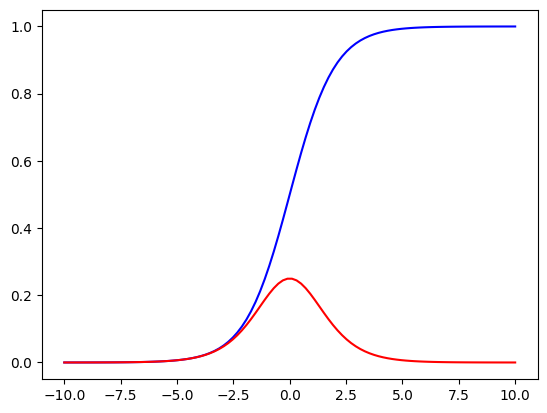

In [19]:
# Yes, it's freaky that the derivative involves the function itself. 
# Calculus is cool, but we're not going to talk about that today!
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.plot(r, sigmoid_prime(r), 'r')
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                7850      
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 10)                110       
                                                                 
 dense_20 (Dense)            (None, 10)               

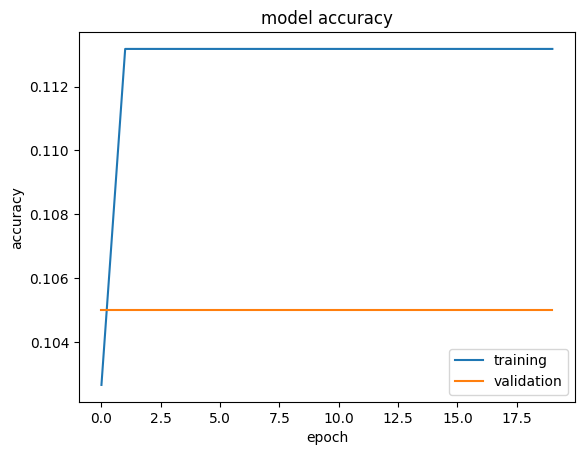

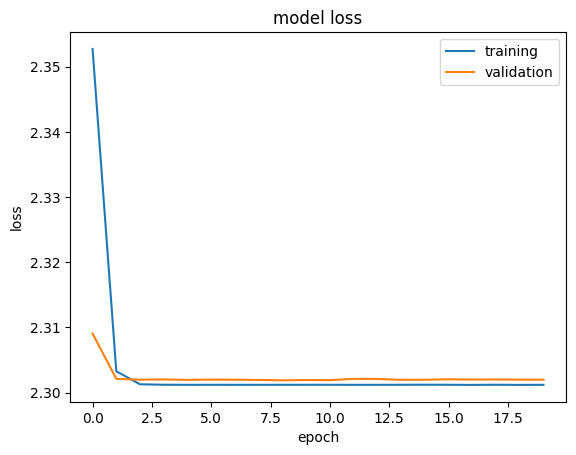

Test loss: 2.3
Test accuracy: 0.113


In [20]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

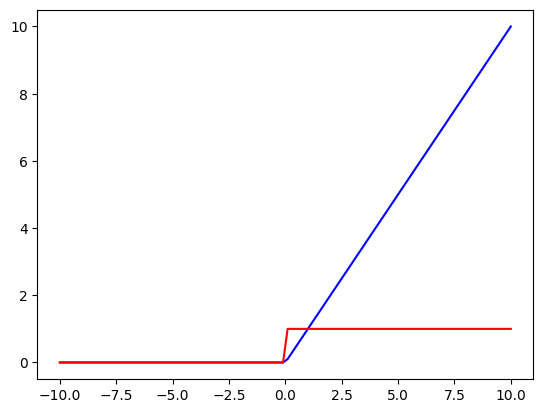

In [21]:
# This function is hard to read because we're applying it to
# numpy arrays, but for each item in x we return max(0, x[i])
def relu(x):
    return np.maximum(x, np.zeros(len(x)))

# This function is non-continuous, but the derivative can be 
# expressed as a very simple discrete function that works for
# our purpose, if x[i] > 0 return 1, else return 0:
def relu_prime(x):
    return np.array([1 if num > 0 else 0 for num in x])

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, relu(r), 'b')
plt.plot(r, relu_prime(r), 'r')
plt.show()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                7850      
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)                110       
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
 dense_32 (Dense)            (None, 10)               

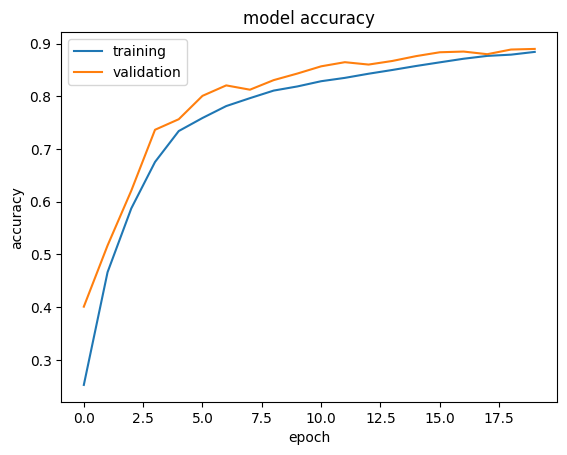

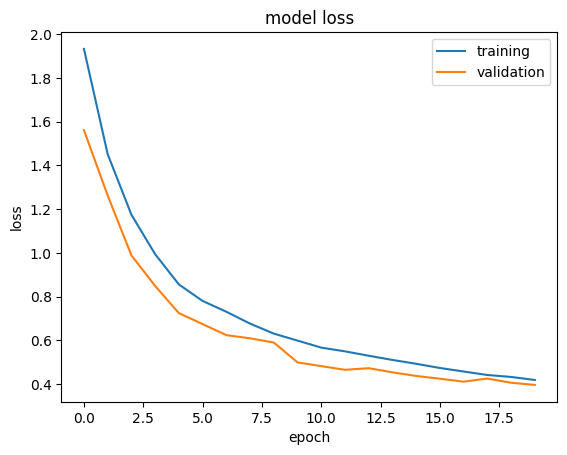

Test loss: 0.459
Test accuracy: 0.878


In [22]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

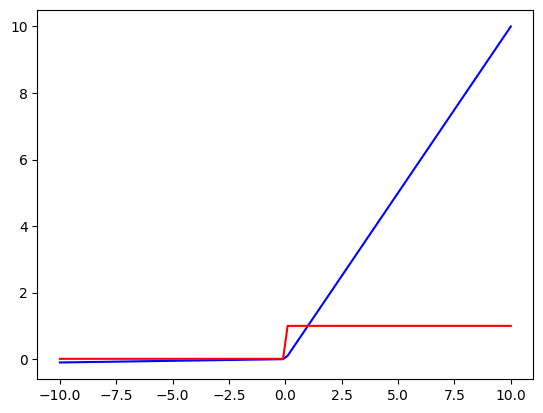

In [23]:
# For values greater than 0, leaky ReLU is the same as ReLU.
# For values less than 0, we return x[i] * 0.01 instead of just 0
# Now the gradient cannot die, because the line always has a slope.
def leaky_relu(x):
    return np.array([num if num > 0 else num * .01 for num in x])

def leaky_relu_prime(x):
    return np.array([1 if num > 0 else .01 for num in x])

r = np.linspace(-10, 10, 100)
plt.plot(r, leaky_relu(r), 'b')
plt.plot(r, leaky_relu_prime(r), 'r')
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                7850      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 10)               

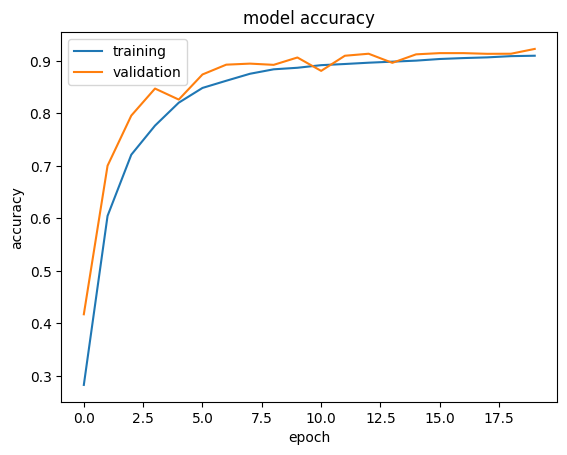

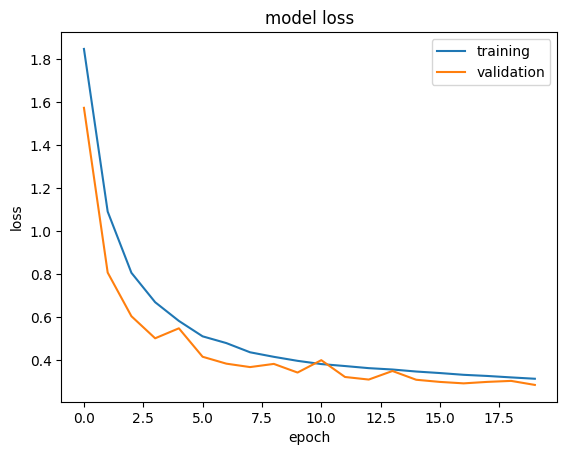

Test loss: 0.328
Test accuracy: 0.907


In [24]:
# Using Leakly ReLU is slightly different in Keras, which can be annoying.
# Additionally, Keras allows us to choose any slope we want for the "leaky" part
# rather than being statically 0.01 as in the above two functions. 
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=.01))

for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                7850      
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 10)              

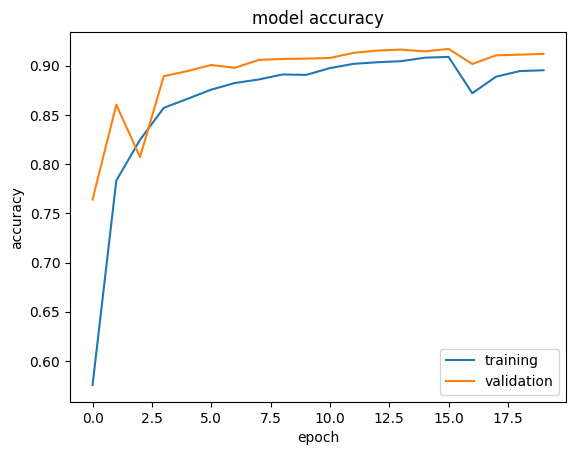

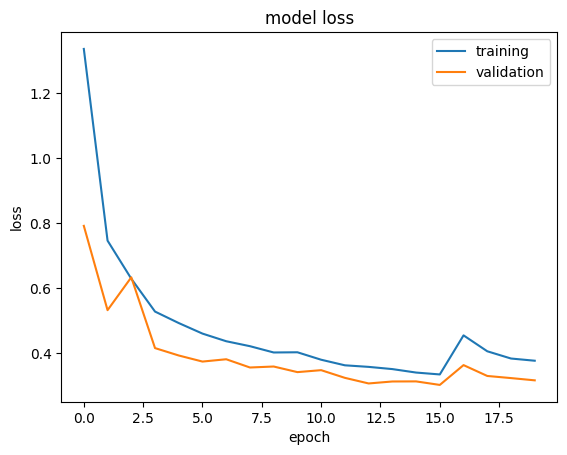

Test loss: 0.367
Test accuracy: 0.899


In [25]:
model = Sequential()
model.add(Dense(units=10, activation='selu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='selu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 10)                7850      
                                                                 
 dense_63 (Dense)            (None, 10)                110       
                                                                 
 dense_64 (Dense)            (None, 10)                110       
                                                                 
 dense_65 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 10)                0         
                                                                 
 dense_66 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 10)              

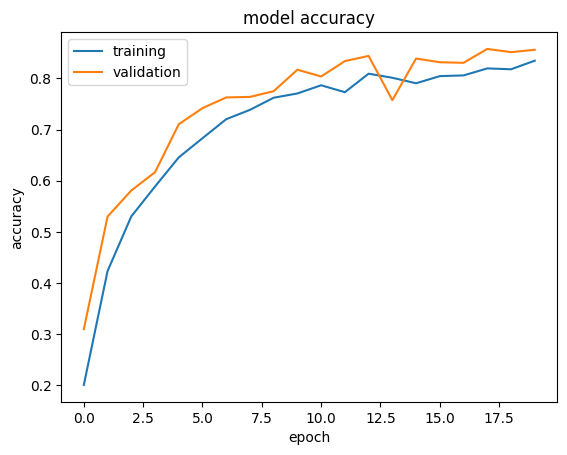

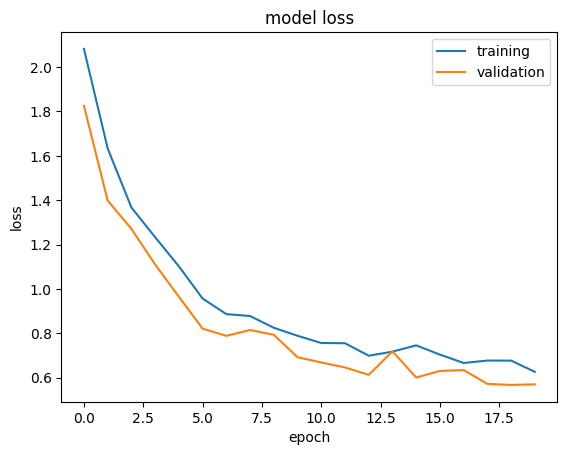

Test loss: 0.61
Test accuracy: 0.837


In [26]:
model = Sequential()

model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=10, activation='exponential'))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.05))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.3))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [27]:
# This should look familiar by now:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, loss_function):
    figure = plt.figure()
    figure.suptitle(loss_function)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()
    
    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [28]:
# We'll use this same model multiple times
def fresh_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(image_size,)))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model
    

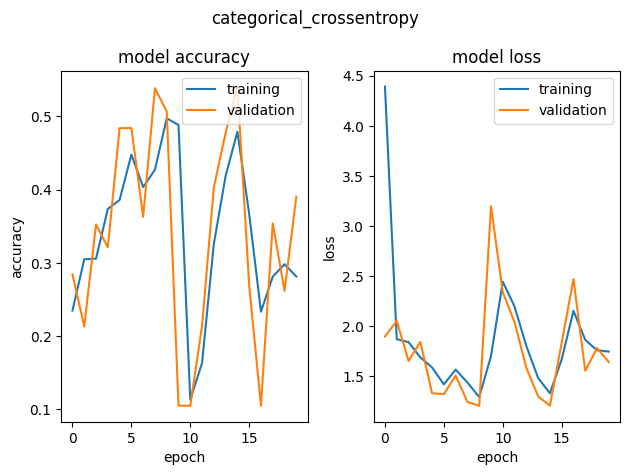

Test loss: 1.67
Test accuracy: 0.382


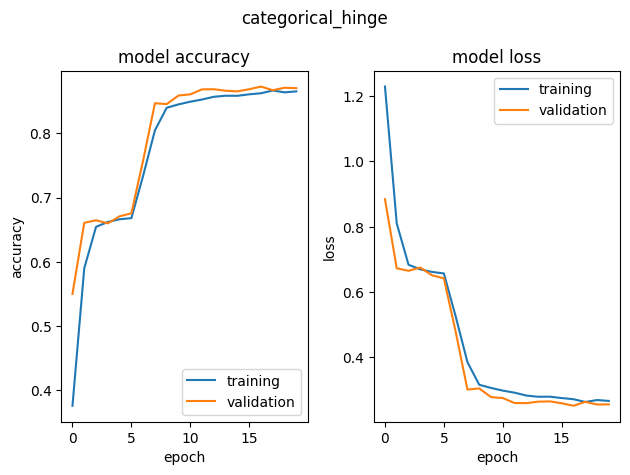

Test loss: 0.267
Test accuracy: 0.866


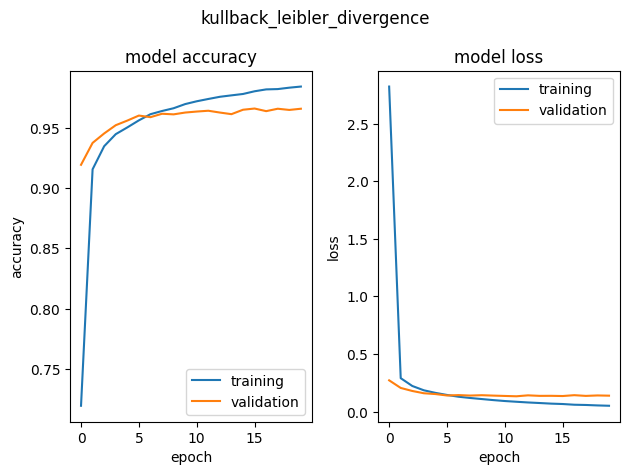

Test loss: 0.176
Test accuracy: 0.959


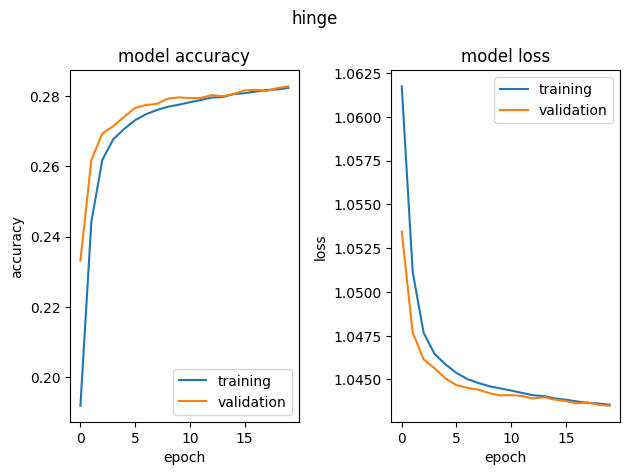

Test loss: 1.04
Test accuracy: 0.281


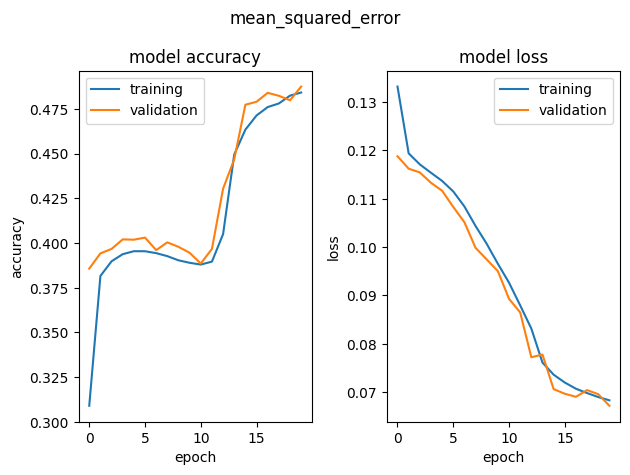

Test loss: 0.068
Test accuracy: 0.483


In [30]:
# For classification, Keras has several loss functions for classification
# Not all of the loss functions are designed for classification problems, such as mean_squared_error
# but we can still tell keras to use those functions, though the results may not be great
# There are also some special loss functions that are specific to binary classification. 
# Lets look at some that are:
loss_functions = [
    'categorical_crossentropy',
    'categorical_hinge',
    'kullback_leibler_divergence',
    'hinge',
    'mean_squared_error'
]

histories = []

for loss_function in loss_functions:
    model = fresh_model()
    model.compile(optimizer="sgd", loss=loss_function, metrics=['accuracy'])
    history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    plot_training_history(history, model, loss_function)
    histories.append(history)

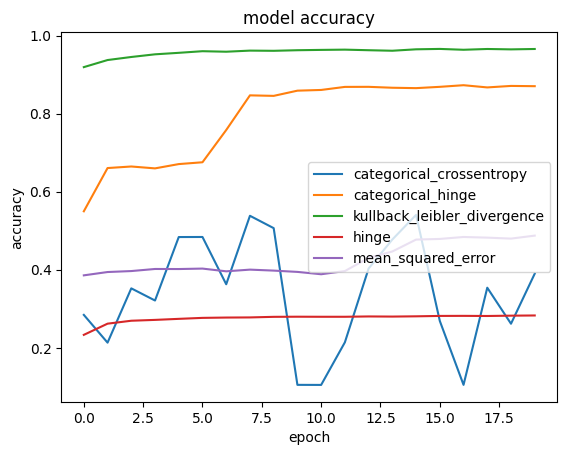

In [31]:
# Cleaner visulizations all in one place
for loss_function, history in zip(loss_functions, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loss_functions, loc='best')
plt.show()

In [32]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

In [33]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [34]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

In [ ]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = fresh_model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

In [ ]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()